# Payoff Builder Pattern V0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from calc_engine.option_pricing import analytical_solutions as an

In [5]:
from analysis_toolset import pre_add_func as pf
from price_data.process_price_data import get_close_prices
import matplotlib.pyplot as plt
from analysis_toolset.pre_add_func import price_spike_hist, neg_pos_price_spike_hist, plot_price_spikes
import numpy as np

In [2]:
close_prices = get_close_prices("SPY", "2020-01-01", "2021-05-03")
#price_spike, dates = pf.price_spikes(close_prices)

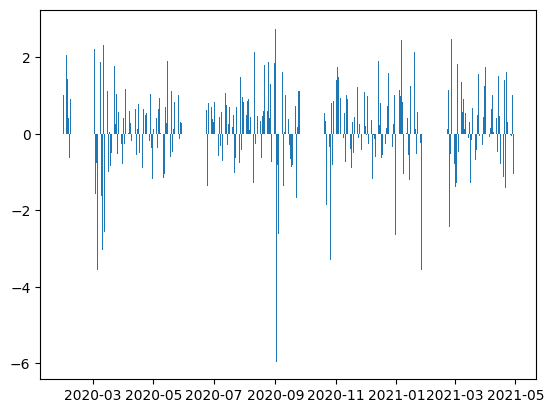

In [6]:
plot_price_spikes(close_prices)

In [18]:
pos_spikes_filter = np.where(price_spikes > 0)
pos_spikes = price_spikes[pos_spikes_filter]

neg_spikes_filter = np.where(price_spikes < 0)
neg_spikes = price_spikes[neg_spikes_filter]
neg_spikes

array([-6.43219210e-01, -1.27743752e-01, -3.13676541e-01, -4.97523526e-01,
       -1.23591207e+00, -3.82048104e+00, -2.68500270e+00, -2.91080215e-01,
       -3.64239302e+00, -2.70291087e-01, -1.56948946e+00, -1.57893067e+00,
       -7.56717893e-01, -3.56464294e+00, -1.61437130e+00, -3.03864375e+00,
       -2.57481323e+00, -1.00549757e+00, -8.46743069e-01, -4.99304434e-01,
       -5.18601566e-01, -2.60306940e-01, -7.88393044e-01, -2.54565347e-01,
       -1.84384604e-01, -5.57835460e-01, -5.02199292e-01, -9.05687686e-01,
       -2.46313028e-03, -1.79405713e-01, -3.72039970e-01, -1.18678248e+00,
       -3.65568712e-01, -1.14529096e+00, -1.03960444e+00, -6.16281846e-01,
       -4.63886666e-01, -1.23808578e-01, -2.15925781e-01, -5.92228016e-01,
       -4.34401728e-01, -4.88822925e+00, -2.41564107e-01, -3.41632053e-01,
       -1.53835632e+00, -1.35433145e+00, -5.71735144e-01, -3.16545820e-01,
       -7.21971607e-01, -2.81684865e-01, -1.02932912e+00, -6.30017053e-01,
       -7.58696066e-01, -

(array([10.,  8.,  7.,  8.,  9., 12., 13.,  6.,  8., 10.,  7.,  9.,  4.,
         7., 11.,  8.,  4.,  3.,  2.,  4.,  3.,  3.,  3.,  2.,  1.,  3.,
         4.,  2.,  0.,  1.,  3.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
         2.]),
 array([0.0044242 , 0.07444019, 0.14445618, 0.21447217, 0.28448816,
        0.35450415, 0.42452014, 0.49453613, 0.56455212, 0.63456811,
        0.7045841 , 0.77460009, 0.84461608, 0.91463207, 0.98464805,
        1.05466404, 1.12468003, 1.19469602, 1.26471201, 1.334728  ,
        1.40474399, 1.47475998, 1.54477597, 1.61479196, 1.68480795,
        1.75482394, 1.82483993, 1.89485592, 1.96487191, 2.0348879 ,
        2.10490389, 2.17491988, 2.24493587, 2.31495186, 2.38496784,
        2.45498383, 2.52499982, 2.59501581, 2.6650318 , 2.73504779,
        2.80506378]),
 <BarContainer object of 40 artists>)

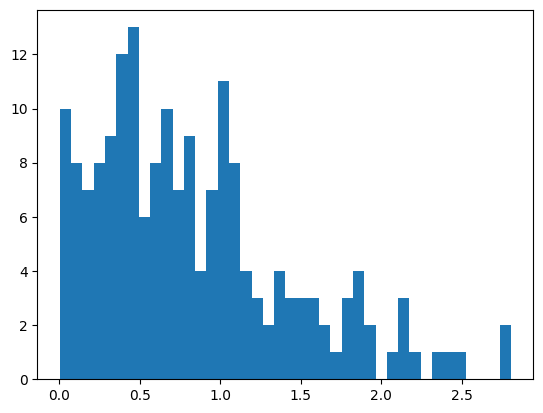

In [22]:
plt.hist(pos_spikes, bins=40)

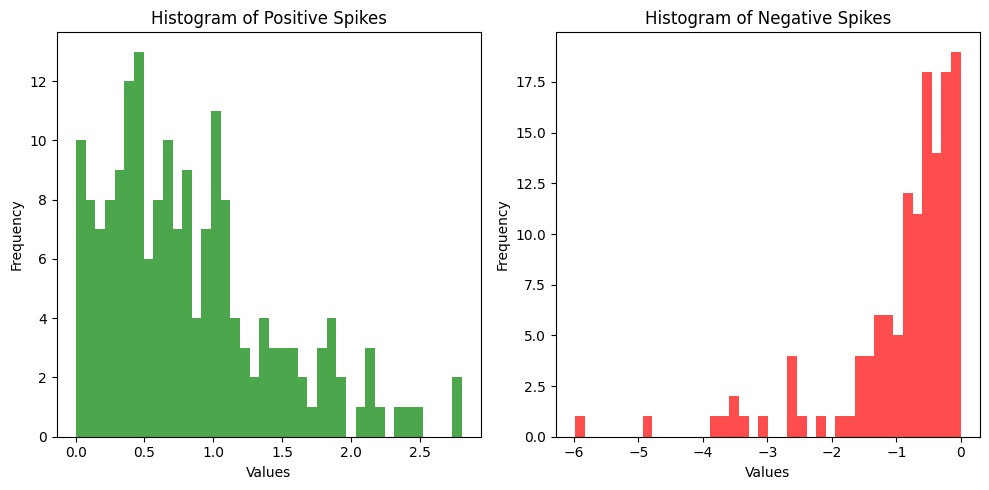

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
pos_spikes_filter = np.where(price_spikes > 0)
pos_spikes = price_spikes[pos_spikes_filter]

neg_spikes_filter = np.where(price_spikes < 0)
neg_spikes = price_spikes[neg_spikes_filter]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histogram on the first subplot
axes[0].hist(pos_spikes, bins=40, color='green', alpha=0.7)
axes[0].set_title('Histogram of Positive Spikes')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot histogram on the second subplot
axes[1].hist(neg_spikes, bins=40, color='red', alpha=0.7)
axes[1].set_title('Histogram of Negative Spikes')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')

# Tight layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Optimize Heston

In [1]:
from option_data.process_option_chain import OptionFactory
from data_processor.volatility_processor import price_surface_heston

import numpy as np

In [29]:
ticker = "SPY"
close_date = "2025-01-03"
strike_min = 500
strike_max = 700

call_graph = OptionFactory().create_option_graph(ticker, close_date)

exps = ['2025-01-31', '2025-02-28', '2025-06-30', '2025-09-30', '2025-12-31', '2026-03-20', '2026-06-18', '2026-12-18']
#exps = list(call_graph.get_expirations())

strikes = call_graph.get_specified_strikes(strike_min, strike_max, steps=10, exp='2025-01-07')

price_surface, dtes, _, _, _ = price_surface_heston(ticker, close_date, strikes, exps)

In [30]:
price_surface

for i, price_list in enumerate(price_surface):
    print(f"len of price {len(price_list)}")
    print(price_list)

len of price 11
[np.float64(53.5), np.float64(18.26), np.float64(11.0), np.float64(5.35), np.float64(1.9), np.float64(0.54), np.float64(0.15), np.float64(0.07), np.float64(0.05), np.float64(0.03), np.float64(0.03)]
len of price 11
[np.float64(56.89), np.float64(23.12), np.float64(16.05), np.float64(9.99), np.float64(5.38), np.float64(2.5), np.float64(1.04), np.float64(0.41), np.float64(0.18), np.float64(0.1), np.float64(0.07)]
len of price 11
[np.float64(63.49), np.float64(37.71), np.float64(30.78), np.float64(24.9), np.float64(19.28), np.float64(13.89), np.float64(9.8), np.float64(6.8), np.float64(4.29), np.float64(2.75), np.float64(1.46)]
len of price 11
[np.float64(79.3), np.float64(45.2), np.float64(38.28), np.float64(34.81), np.float64(26.59), np.float64(22.16), np.float64(17.84), np.float64(13.12), np.float64(9.43), np.float64(7.17), np.float64(5.2)]
len of price 11
[np.float64(86.29), np.float64(57.07), np.float64(49.46), np.float64(43.47), np.float64(35.57), np.float64(30.83), 

In [15]:
list(call_graph.get_expirations())

['2025-01-03',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-09',
 '2025-01-10',
 '2025-01-17',
 '2025-01-24',
 '2025-01-31',
 '2025-02-07',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-12-19',
 '2025-12-31',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15']

# Position/Portfolio Analysis
##### Add quantity instance variable in each

In [42]:
from abc import ABC, abstractmethod
from calc_engine.option_pricing.analytical_solutions import BlackScholesMertonAnalytical as bsm
from calc_engine.greeks import analytical_greeks as ag
import matplotlib.pyplot as plt
import numpy as np

class Position(ABC):
    pass

class OptionPosition(Position):

    def __init__(self, price: float, S: float, K: float, T: float, sigma: float, r: float, otype: str, q: int = None, quantity: float = 1) -> None:
        self.price: float = price
        self.S: float = S
        self.K: float = K
        self.T: float = T
        self.sigma: float = sigma
        self.r: float = r
        self.otype: str = otype
        self.q: float = q
        self.quantity: int = quantity

    def position_value(self) -> float:

        if self.price is None:
            raise ValueError("Market Price is not defined")
        
        else:
            return self.price * self.quantity

    def position_notional_value(self) -> float:
        
        if self.price is None:
            raise ValueError("Market Price is not defined")
        
        else:
            return self.price * self.quantity * 100
        
    def __repr__(self) -> str:
        return "Option"
    
class StockPosition(Position):
    """
    For short positions the quantity must be negative
    """

    def __init__(self, price: float, quantity: int = 1) -> None:
        self.price: float = price
        self.quantity: int = quantity

    def position_notional_value(self) -> float:
        return self.price * self.quantity
    
    def __repr__(self) -> str:
        return "Stock"
    
class Portfolio:

    def __init__(self) -> None:
        self.positions: list = []

    def add_option_position(self, price: float, S: float, K: float, T: float, sigma: float, r: float, otype: str, q: int = 0, quantity: float = 1) -> None:
        option_position = OptionPosition(price, S, K, T, sigma, r, otype, q, quantity)
        self.positions.append(option_position)

    def add_stock_position(self, price: float, quantity: int) -> None:
        stock_position = StockPosition(price, quantity)
        return self.positions.append(stock_position)
    
    def notinal_value(self) -> float:
        n_value = 0 
        for position in self.positions:
            p_val = position.position_notional_value()
            n_value += p_val
        
        return n_value
    
    def __iter__(self):
        for position in self.positions:
            yield position

In [44]:
call1 = bsm.call(500, 500, 0.5, .2, 0.04)
put1 = bsm.put(500, 500, 0.5, .2, 0.04)

test_portfolio = Portfolio()

test_portfolio.add_option_position(call1, 500, 500, 0.5, .2, .04, "call")
test_portfolio.add_option_position(put1, 500, 500, 0.5, .2, .04, "put")

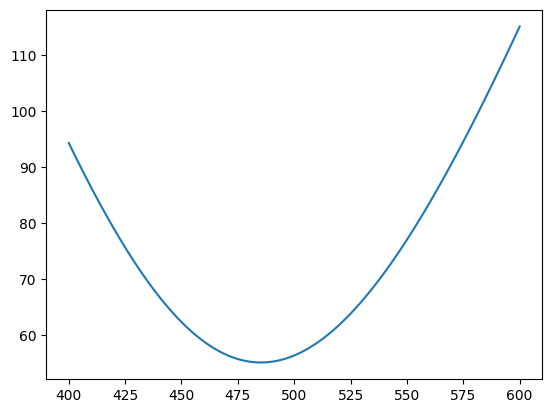

In [47]:
prices = np.linspace(400, 600, 100)

position_value = 0

for pos in test_portfolio:
    if repr(pos) == "Option":
        if pos.otype == 'call':
            price = bsm.call(prices, 500, .5, .2, .04)

        elif pos.otype == 'put':
            price = bsm.put(prices, 500, .5, .2, .04)

        position_value += price

    else:
        print(False)

plt.plot(prices, position_value)

# Misc

In [1]:
from calc_engine.option_pricing import analytical_solutions as an

In [18]:
bsm = an.BlackScholesMertonAnalytical()

bsm.call(590, 600, 30/365, .11, .05)

np.float64(4.297671668036969)

In [ ]:
import numpy as np

def atm_skew(arr, K):
    moneyness = np.array(arr) / K
    

    return lower_b

arr = [90, 95, 100, 105, 110]

atm_skew(arr, 100)

TypeError: isclose() missing 1 required positional argument: 'b'

#### $$H = \frac{log(R/S)}{log(T)}$$